In [8]:
import warnings
warnings.filterwarnings("ignore")
import os 
import pandas as pd 
from Tokenizers import *
from Vectorizers import * 
from Topic_modelling import *
from Load_research_paper_dataset import *


# Topic extraction : example 


## Load Research paper datasets: 

1) The dataset consists in a training and a testing set. Both contains scientific papers with titles, abstracts and a research field labels: 
    - "Computer Science"
    - "Physics"
    - "Mathematics"
    - "Statistics"
    - "Quantitative Biology"
    - "Quantitative Finance"
 

In [9]:
training = "/Users/coca-cola/Desktop//NLP_Projects/Research paper abstract analysis/archive-2/train.csv"
testing = "/Users/coca-cola/Desktop//NLP_Projects/Research paper abstract analysis/archive-2/test.csv"

load_dataset = loadDataset(path = training, weights = False)


## Tokenization 
1) We only work on the abstracts from the training dataset. The preprocessing steps consist in tokenizing the abstracts: 
    - Punctuation removal 
    - Convert numbers to word numbers 
    - Replace science related entities such as algorithm names, conventions, gene names ... that could not be interesting to extract high level topics
    

In [ ]:
tokenizer = Tokenizers()
tokenized_documents = tokenizer.tokenize_documents(load_dataset.documents)
tokenized_documents = tokenizer.numbers_to_word(tokenized_documents)
tokenized_documents = tokenizer.replace_words_regexp(tokenized_documents, pattern = "([a-z]*[^a-z]+.*|[^a-z]+[a-z]*.*)", replace = "")
tokenized_documents = tokenizer.word_to_string(tokenized_documents) 

## Vectorization 
1) We compute word count and word frequencies (tfidf) by taking account of: 
    - n-gram distribution 
    - min and max word frequencies
    - size of the vocabulary 
    

In [ ]:
vectorizer = Vectorizers()
counts, vocabulary, stop_words = vectorizer.count_vectorizer(tokenized_documents,n_gram_range = (1,4), min_df = 1, max_df = 0.8,
                                                             tokenizer = None,lowercase = False,input = "content",max_features = 1000)

tfidf, idf, vocabulary, stop_words = vectorizer.tfidf_vectorizer(tokenized_documents, n_gram_range = (1,4), min_df = 1, max_df = 1, use_idf = True, smooth_idf = True)           

## Find topics 
1) We use latent dirichlet allocation (LDA) to perform latent semantic analysis (LSA) on the word counts matrices. 

2) To select the optimal number of topics, we follow this algorithm:


    - Define a min and max number of topics 
    - Define a min and max number of clusters
    
    For each number of topics:
        - Compute LDA 
            - Determine Kmeans clusters from min to max number of clusters

    For each number of clusters:
            -Evaluate cluster separability using silhouette coefficient

    - Select the number of topics that maximize the area under the curve silhouette coefficient distribution
    - Select the number of clusters that maximize silhouette coefficient for this number of topics. 
 
<br>


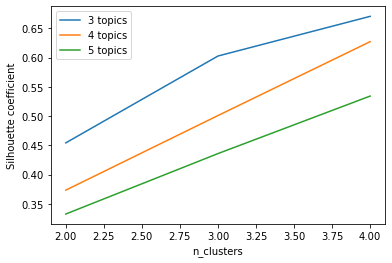

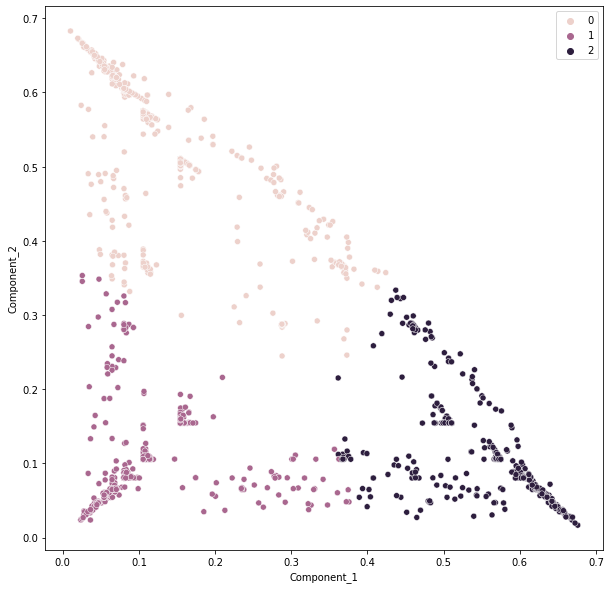

In [216]:
topic_modelling = TopicModelling()
topic_modelling.get_lda_clusters(counts, max_clusters=5, min_topic = 3, max_topics = 6)
topic_modelling.get_best_topics(counts)

## Results
The best number of topics found is 3, with 3 clusters being the best trade-off.<br> 
Increasing the number of clusters improves cluster separability suggesting that topics could be subdivised into subtopics. 